In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Edge-2 IoT Dataset.csv', low_memory=False)

In [ ]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)
df.isna().sum()
print(df['Attack_type'].value_counts())

Attack_type
Ransomware        4061
Fingerprinting     853
MITM               358
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")

In [ ]:
df.to_csv('preprocessed_DNN.csv', encoding='utf-8', index=False)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('./preprocessed_DNN.csv', low_memory=False)
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,Attack_label,Attack_type,http.request.method-0,http.referer-0,http.request.version-0,dns.qry.name.len-0.0,dns.qry.name.len-1.0,mqtt.conack.flags-0.0,mqtt.protoname-0.0,mqtt.topic-0.0
0,0,0,0,0,0,0,0,0,251553,266017374,...,1.0,Ransomware,True,True,True,True,False,True,True,True
1,0,0,5497,0,0,0,0,0,0,0,...,1.0,Fingerprinting,True,True,True,True,False,True,True,True
2,0,0,0,0,0,0,0,0,419025,266184846,...,1.0,Ransomware,True,True,True,True,False,True,True,True
3,0,0,0,0,0,0,0,0,1,2013966124,...,1.0,Ransomware,True,True,True,True,False,True,True,True
4,0,0,0,0,0,0,0,0,1,949137538,...,1.0,Fingerprinting,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,0,0,0,0,0,0,0,0,0,0,...,1.0,Ransomware,True,True,True,True,False,True,True,True
5268,0,0,0,0,0,0,0,0,356385,266122206,...,1.0,Ransomware,True,True,True,True,False,True,True,True
5269,0,0,0,0,0,0,0,0,83137,2397997529,...,1.0,Ransomware,True,True,True,True,False,True,True,True
5270,0,0,0,0,0,0,0,0,1,1013594299,...,1.0,Ransomware,True,True,True,True,False,True,True,True


In [ ]:
df['Attack_type'].value_counts()

,count
Attack_type,
Ransomware,4061
Fingerprinting,853
MITM,358


In [ ]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)

In [ ]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [ ]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [ ]:
df[skip_list[3]].value_counts()

,count
mqtt.msg_decoded_as,
0.0,5272


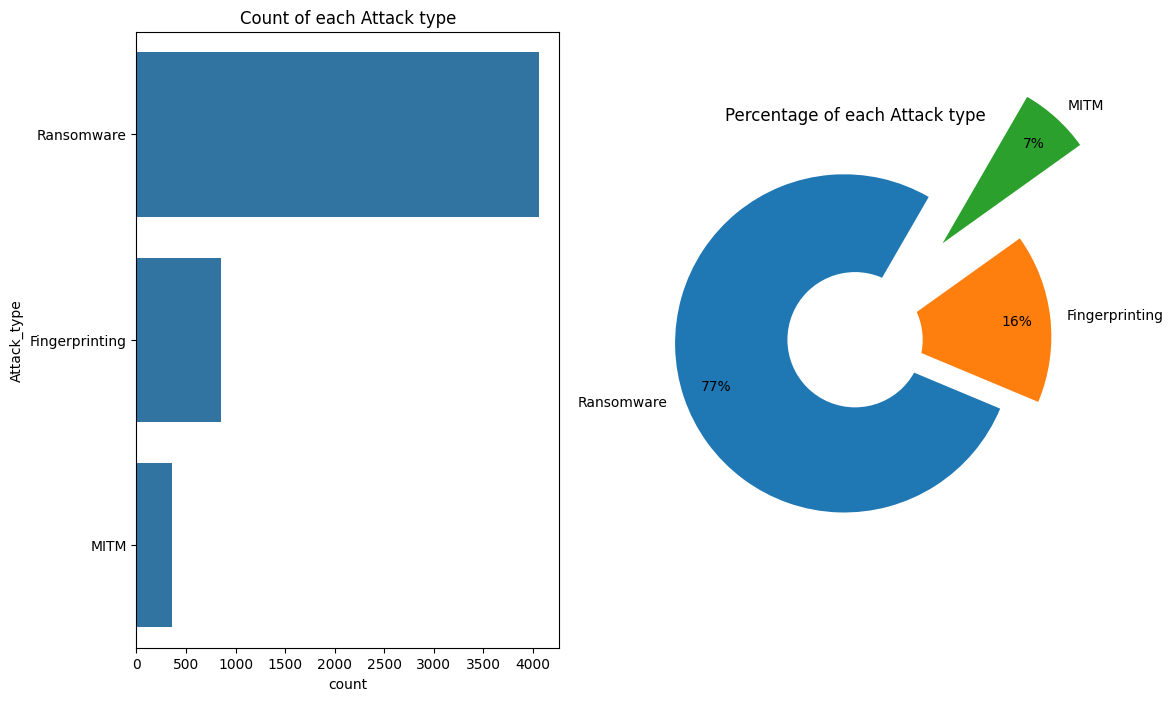

In [ ]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[label_col].dropna().value_counts()))/sum(list(df[label_col].dropna().value_counts())))[::-1])[:]
labels = list(df[label_col].dropna().unique())[:]
sizes = df[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")
plt.show()

In [ ]:
X = df.drop([label_col], axis=1)
y = df[label_col]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4217, 48)
(1055, 48)


In [ ]:
input_shape = X_train.shape[1:]

In [ ]:
print(X_train.shape, X_test.shape)
print(input_shape)

(4217, 48) (1055, 48)
(48,)


In [ ]:
num_classes = len(np.unique(y_train))
num_classes

3

In [ ]:
from  tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
print(y_train.shape, y_test.shape)

(4217, 3) (1055, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(input_shape[0], 1)))
model.add(MaxPooling1D(2))
# model.add(Conv1D(64, 3, activation='relu', input_shape=(input_shape)))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(64, 3, activation='relu', input_shape=(input_shape)))
# model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 46, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 23, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 21, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 8, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,067 (250.26 KB)

 Trainable params: 64,067 (250.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input, ZeroPadding1D
from tensorflow.keras.layers import MaxPooling1D, Add, AveragePooling1D
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam#input the model before this cell
#model = build_model(num_classes, input_shape=input_shape)
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss= tf.keras.metrics.categorical_crossentropy,
                  metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
#from livelossplot import PlotLossesKeras


#model_weights_file_path = "model_best_weights.h5"
#checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_loss", verbose=1, save_best_only=True, mode="min", save_weights_only=True)
#checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_loss", verbose=1, save_best_only=True, mode="min", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, mode="min", verbose=1, min_lr=0)
#plotlosses = PlotLossesKeras()
call_backs = [ early_stopping, lr_reduce]
EPOCHS = 15
BATCH_SIZE = 256
call_backs = [early_stopping, lr_reduce]
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    validation_split=0.1,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=call_backs,
                    #class_weight=class_weights,
                    verbose=1)


Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6314 - loss: 0.9264 - val_accuracy: 0.7706 - val_loss: 0.4409 - learning_rate: 0.0010
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.8370 - loss: 0.3704 - val_accuracy: 0.9422 - val_loss: 0.1965 - learning_rate: 0.0010
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9351 - loss: 0.1859 - val_accuracy: 0.9403 - val_loss: 0.1352 - learning_rate: 0.0010
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9415 - loss: 0.1265 - val_accuracy: 0.9374 - val_loss: 0.1121 - learning_rate: 0.0010
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9444 - loss: 0.1021 - val_accuracy: 0.9431 - val_loss: 0.1032 - learning_rate: 0.0010
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9434 - loss: 0.0977 - val_accuracy: 0.9507 - val_loss: 0.0961 - learning_rate: 0.0010
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9561 - loss: 0.0876 - val_acc

In [ ]:
import tensorflow as tf

# Assume your model is compiled and trained

@tf.function
def fgsm_attack(model, x, y, epsilon):
    with tf.GradientTape() as tape:
        tape.watch(x)
        prediction = model(x)
        loss = tf.keras.losses.categorical_crossentropy(y, prediction)
    gradient = tape.gradient(loss, x)
    perturbation = epsilon * tf.sign(gradient)
    x_adv = x + perturbation
    return tf.clip_by_value(x_adv, 0, 1)  # or your input range

In [ ]:
def pgd_attack(model, x, y, epsilon, alpha, num_iter):
    x_adv = tf.identity(x)
    for i in range(num_iter):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            prediction = model(x_adv)
            loss = tf.keras.losses.categorical_crossentropy(y, prediction)
        gradient = tape.gradient(loss, x_adv)
        x_adv = x_adv + alpha * tf.sign(gradient)

        # Project back to epsilon-ball
        x_adv = tf.clip_by_value(x_adv, x - epsilon, x + epsilon)
        x_adv = tf.clip_by_value(x_adv, 0, 1)
    return x_adv

In [ ]:
import numpy as np

# 30% indices
num_poison = int(0.3 * len(X_train))
idx = np.random.choice(len(X_train), size=num_poison, replace=False)

X_poison = fgsm_attack(model, X_train[idx], y_train[idx], epsilon=0.1)

# Replace clean with poisoned
X_train_poisoned = np.copy(X_train)
X_train_poisoned[idx] = X_poison

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
#from livelossplot import PlotLossesKeras


#model_weights_file_path = "model_best_weights.h5"
#checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_loss", verbose=1, save_best_only=True, mode="min", save_weights_only=True)
#checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_loss", verbose=1, save_best_only=True, mode="min", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, mode="min", verbose=1, min_lr=0)
#plotlosses = PlotLossesKeras()
call_backs = [ early_stopping, lr_reduce]
EPOCHS = 15
BATCH_SIZE = 256
call_backs = [early_stopping, lr_reduce]
history = model.fit(X_train_poisoned, y_train,
                    validation_data=(X_test, y_test),
                    validation_split=0.1,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=call_backs,
                    #class_weight=class_weights,
                    verbose=1)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9366 - loss: 0.1070 - val_accuracy: 0.9469 - val_loss: 0.0838 - learning_rate: 0.0010
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9490 - loss: 0.0877 - val_accuracy: 0.9545 - val_loss: 0.0832 - learning_rate: 0.0010
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9581 - loss: 0.0771 - val_accuracy: 0.9507 - val_loss: 0.0822 - learning_rate: 0.0010
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9626 - loss: 0.0705 - val_accuracy: 0.9498 - val_loss: 0.0958 - learning_rate: 0.0010
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9660 - loss: 0.0682 - val_accuracy: 0.9545 - val_loss: 0.0796 - learning_rate: 0.0010
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9757 - loss: 0.0608 - val_accuracy: 0.9526 - val_loss: 0.0845 - learning_rate: 0.0010
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9732 - loss: 0.0605 - val_acc